In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#needed to import qke procedures
import sys
from pathlib import Path

main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

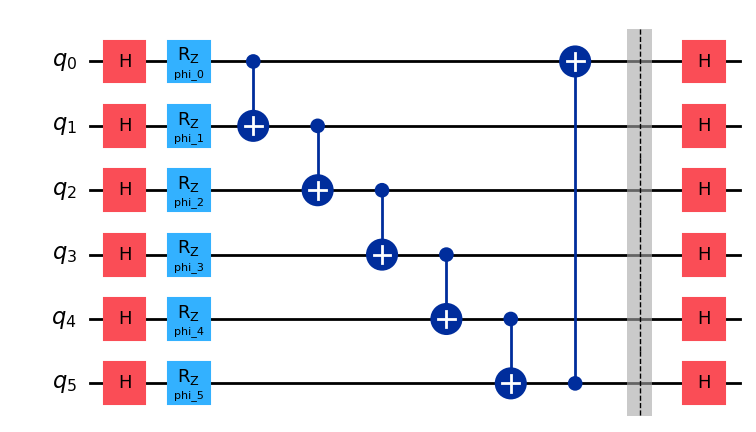

In [17]:
from pqk.Circuits import Circuits

q_template = Circuits.ansatz_encoded(6)
q_template.draw('mpl')

In [18]:
#load dataset with panda
#data are scaled outside the notebook
import pandas as pd

env = pd.read_csv('../data/env.sel3.scaled.csv')  
X = env[['illuminance', 'blinds','lamps','rh', 'co2', 'temp']]

In [19]:
X_value = X.values[0]
print(X_value)


[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]


/tmp/ipykernel_46723/4152358813.py:5: DeprecationWarning: CircuitContainer will be deprecated.
  my_q_assigned = CircuitContainer.qEncoding(q_template, X_value)


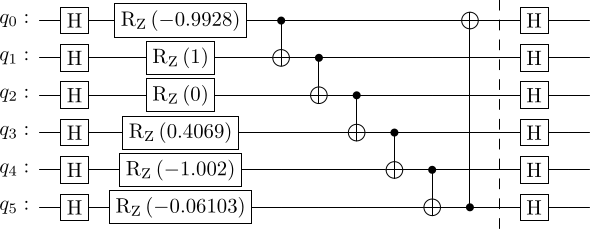

In [25]:
from pqk.CircuitContainer import CircuitContainer

CircuitContainer.qEncoding

my_q_assigned = CircuitContainer.qEncoding(q_template, X_value)
my_q_assigned.draw('latex')

In [21]:
from pqk.QMeasures import QMeasures

#try evaluatin function
a = QMeasures.Aer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'], nshots = 4)
b = QMeasures.PrimitiveEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'], nshots = 'fdf' )
c = QMeasures.StateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

print(type(a))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]
[0.2295341  0.53141251 0.55603635 0.88246498 0.67729602 0.32347667]
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]


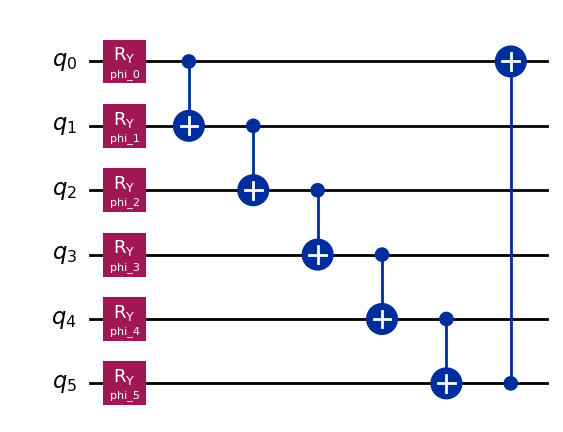

In [22]:
q_template_polar = Circuits.y_encoded(6)
q_template_polar.draw('mpl')

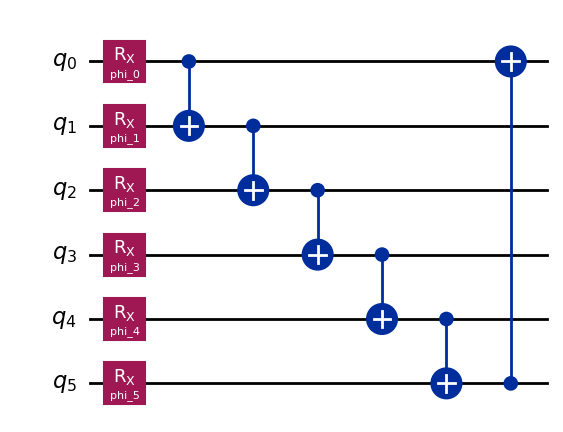

In [23]:
#try circuit X
x_enconding = Circuits.x_encoded(n_wire= 6)
x_enconding.draw('mpl')

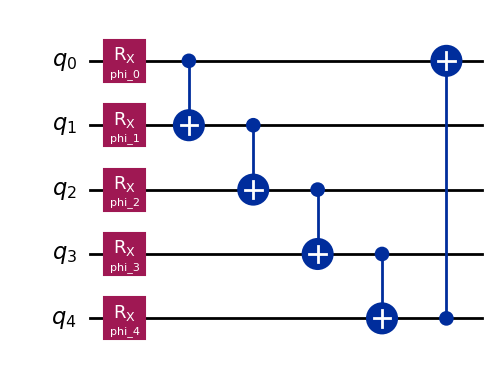

In [24]:
ss = Circuits.x_encoded(n_wire=5, full_ent=True)
ss.draw('mpl')

In [14]:
from pqk.CircuitContainer import CircuitContainer
from pqk.QMeasures import QMeasures
c_zz = CircuitContainer(qtemplate=Circuits.zzfeaturemap, nwire=6, obs=['ZIIIII'], measure_fn=QMeasures.StateVectorEstimator)
c_zz.metadata()

*** Create a Container ***


/home/francesco/git/QK/pqk/CircuitContainer.py:21: DeprecationWarning: CircuitContainer will be deprecated.
  cls._instance = cls(*args, **kwargs)


AttributeError: 'CircuitContainer' object has no attribute '__qualname__'

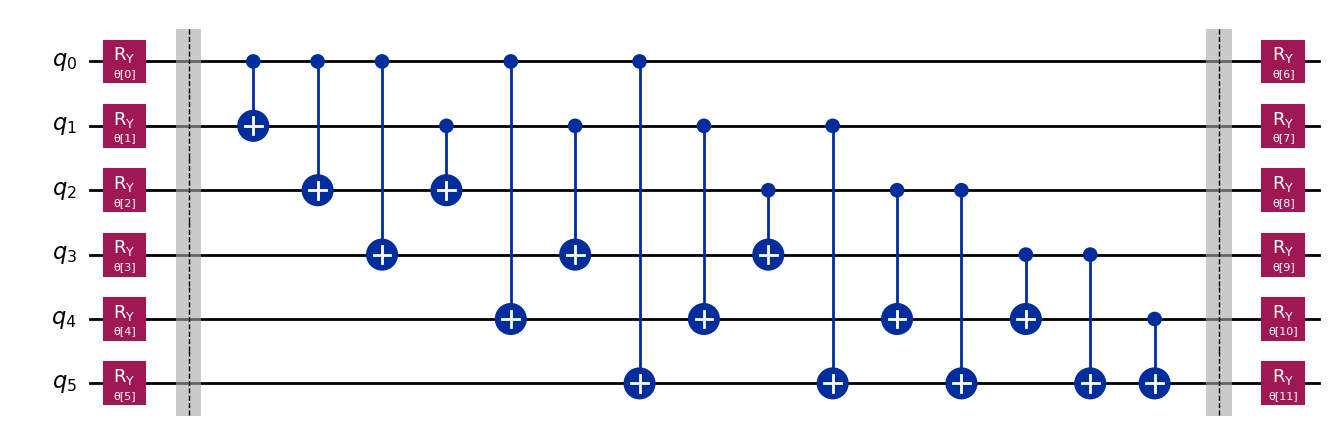

Numbers of layers: 12


In [12]:
from qiskit.circuit.library import TwoLocal

n_qubits = 6
n_layers = 1
#circuit = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=n_layers)
twl = TwoLocal(n_qubits, 
                   rotation_blocks='ry', 
                   entanglement_blocks='cx', 
                   entanglement='full', 
                   reps=n_layers, 
                   insert_barriers=True, skip_final_rotation_layer=False)

display(twl.decompose().draw('mpl'))


num_pars = len(twl.parameters)
print(f'Numbers of layers: {num_pars}')




In [13]:
import numpy as np

#from sklearn.metrics.pairwise import linear_kernel as l
from sklearn.metrics.pairwise import rbf_kernel
#from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import linear_kernel
from pqk.CKernels import CKernels


x = np.array([6,10]) 
y = np.array([8,7]) 
z = np.array([x,y]) 

print(z)
print(rbf_kernel(z)[0][1])
print(linear_kernel(z)[0][1])
print(CKernels.rbf(x,y))
print(CKernels.linear(x,y))






[[ 6 10]
 [ 8  7]]
0.0015034391929775724
118.0
0.0015034391929775739
118


In [14]:
xyz = Circuits.xyz_encoded(n_wire=6, full_ent=True)

In [15]:
print(xyz.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_0})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_0})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_0})} & \ctrl{1} & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_1})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_1})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_1})} & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_2})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_2})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_2})} & \qw & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_3})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_3})} & \gate{\mathrm{R_Z}\,(\mathrm{phi

In [16]:
my_q_assigned = CircuitContainer.qEncoding(xyz, X_value)

In [17]:
print(X_value)
print(my_q_assigned.draw(output='latex_source'))

[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]
\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{-0.9928})} & \gate{\mathrm{R_Y}\,(\mathrm{-0.9928})} & \gate{\mathrm{R_Z}\,(\mathrm{-0.9928})} & \ctrl{1} & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_X}\,(\mathrm{1})} & \gate{\mathrm{R_Y}\,(\mathrm{1})} & \gate{\mathrm{R_Z}\,(\mathrm{1})} & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_X}\,(\mathrm{0})} & \gate{\mathrm{R_Y}\,(\mathrm{0})} & \gate{\mathrm{R_Z}\,(\mathrm{0})} & \qw & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{R_X}\,(\mathrm{0.4069})} & \gate{\mathrm{R

In [19]:
#UNITARY EVOLUTION IS REVERSIBLE!!!!


from qiskit.quantum_info import Statevector, Operator
U = Operator.from_label('T')
#U = Operator(np.array([[np.cos(0.14),  - np.sin(0.14)],[np.sin(0.14), np.cos(0.14)]]))
psi = Statevector.from_label('+')

print(f'Operator: ')
display(U.draw('latex'))
print(f'Is the operator unitary?: {U.is_unitary()}')

print(f'Current state:')
display(psi.draw('latex'))

print('Evolution:')
display(psi.evolve(U).draw('latex'))
print('Inverse Evolution:')
display(psi.evolve(U).evolve(U.adjoint()).draw('latex'))





Operator: 


<IPython.core.display.Latex object>

Is the operator unitary?: True
Current state:


<IPython.core.display.Latex object>

Evolution:


<IPython.core.display.Latex object>

Inverse Evolution:


<IPython.core.display.Latex object>

In [20]:
Operator(np.array([[np.cos(0.14),  - np.sin(0.14)],[np.sin(0.14), np.cos(0.14)]]))

Operator([[ 0.990216  +0.j, -0.13954311+0.j],
          [ 0.13954311+0.j,  0.990216  +0.j]],
         input_dims=(2,), output_dims=(2,))
